### Importing Dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D, ZeroPadding2D
from keras.layers import Conv2D, BatchNormalization
from keras.optimizers import SGD
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

BATCH_SIZE = 64
TRAINING_DATA = 42000
TEST_DATA = 18000

### Loading Datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


### Train Test Split

In [ ]:
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)
print("Data after 70:30 split")
print("----------------------\n")
print("X_train shape :", x_train.shape)
print("X_train shape :", y_train.shape)
print("X_train shape :", x_test.shape)
print("X_train shape :", y_test.shape)

Data after 70:30 split
----------------------

X_train shape : (42000, 32, 32, 3)
X_train shape : (42000, 1)
X_train shape : (18000, 32, 32, 3)
X_train shape : (18000, 1)


### Normalize Data

In [ ]:
def normalize_data(x_train, x_test):
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test
    
x_train, x_test = normalize_data(x_train, x_test)

### Converting Labels to Categorical format

In [ ]:
def process_labels(y_train, y_test):
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return y_train, y_test

y_train, y_test = process_labels(y_train, y_test)    

### 1. Training Neural Net Without Batch Normalization (on Basic Architecture)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D(padding=1))
model.add(Conv2D(64, (5,5), input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = SGD(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
#plot_model(model1, to_file='cifar10_2_layer_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)

# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# applying transformations to image
train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
test_gen = ImageDataGenerator()

training_set= train_gen.flow(x_train, y_train, batch_size = 64)
test_set= train_gen.flow(x_test, y_test, batch_size = 64) 

history = model.fit_generator(training_set, 
                         steps_per_epoch = TRAINING_DATA//BATCH_SIZE,
                         callbacks=callbacks, 
                         validation_data = test_set, 
                         validation_steps = TEST_DATA//BATCH_SIZE, 
                         epochs = 20)
model.save('modelBasic.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
656/656 [==============================] - 82s 124ms/step - loss: 2.1098 - accuracy: 0.2208 - val_loss: 1.5429 - val_accuracy: 0.4464
Epoch 2/20
656/656 [==============================] - 80s 122ms/step - loss: 1.5819 - accuracy: 0.4332 - val_loss: 1.4255 - val_accuracy: 0.4882
Epoch 3/20
656/656 [==============================] - 79s 120ms/step - loss: 1.4410 - accuracy: 0.4836 - val_loss: 1.4507 - val_accuracy: 0.4813
Epoch 4/20
656/656 [==============================] - 80s 122ms/step - loss: 1.3752 - accuracy: 0.5086 - val_loss: 1.3272 - val_accuracy: 0.5246
Epoch 5/20
656/656 [==============================] - 80s 122ms/step - loss: 1.3217 - accuracy: 0.5282 - val_loss: 1.2367 - val_accuracy: 0.5619
Epoch 6/20
656/656 [==============================] - 80s 121ms/step - loss: 1.2758 - accuracy: 0.5464 - val_loss: 1.2348 - val_accuracy: 0.5576
Epoch 7/20
656/656 [==============================] - 79s 121ms/step - loss: 1.2483 - accuracy: 0.5584 - val_loss: 1.2100 - val_ac

### 2. Training Neural Net without Batch Normalization (2 Conv2D Layers)

In [ ]:
model1 = Sequential()

model1.add(Conv2D(64, (5,5), input_shape = (32,32,3)))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(128, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size = (2,2)))
model1.add(Dropout(0.1))

model1.add(Flatten())

model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(optimizer = SGD(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
#plot_model(model1, to_file='cifar10_2_layer_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)

# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# applying transformations to image
train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
test_gen = ImageDataGenerator()

training_set= train_gen.flow(x_train, y_train, batch_size = 64)
test_set= train_gen.flow(x_test, y_test, batch_size = 64) 

history = model1.fit_generator(training_set, 
                         steps_per_epoch = TRAINING_DATA//BATCH_SIZE,
                         callbacks=callbacks, 
                         validation_data = test_set, 
                         validation_steps = TEST_DATA//BATCH_SIZE, 
                         epochs = 20)
model1.save('modelA.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
656/656 [==============================] - 143s 217ms/step - loss: 2.0994 - accuracy: 0.2242 - val_loss: 1.5742 - val_accuracy: 0.4320
Epoch 2/20
656/656 [==============================] - 142s 216ms/step - loss: 1.5662 - accuracy: 0.4341 - val_loss: 1.3683 - val_accuracy: 0.5144
Epoch 3/20
656/656 [==============================] - 143s 218ms/step - loss: 1.3864 - accuracy: 0.5021 - val_loss: 1.2519 - val_accuracy: 0.5595
Epoch 4/20
656/656 [==============================] - 144s 220ms/step - loss: 1.2818 - accuracy: 0.5413 - val_loss: 1.1607 - val_accuracy: 0.5846
Epoch 5/20
656/656 [==============================] - 144s 219ms/step - loss: 1.2071 - accuracy: 0.5719 - val_loss: 1.1528 - val_accuracy: 0.5925
Epoch 6/20
656/656 [==============================] - 143s 218ms/step - loss: 1.1598 - accuracy: 0.5889 - val_loss: 1.1600 - val_accuracy: 0.5954
Epoch 7/20
656/656 [==============================] - 144s 219ms/step - loss: 1.1070 - accuracy: 0.6146 - val_loss: 1.0433 -

### 3. Training with Batch Normalization and 2 Conv2D Layers

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, (5,5), input_shape=(32,32,3)))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Conv2D(128, (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Flatten())

model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer = SGD(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
#plot_model(model2, to_file='cifar10_2_layer_with_batchNorm_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)

# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# applying transformation to image
train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_gen = ImageDataGenerator()

training_set= train_gen.flow(x_train, y_train, batch_size = 64)
test_set= train_gen.flow(x_test, y_test, batch_size = 64)

history2 = model2.fit_generator(training_set, 
                         steps_per_epoch = TRAINING_DATA//BATCH_SIZE,
                         callbacks=callbacks, 
                         validation_data = test_set, 
                         validation_steps = TEST_DATA//BATCH_SIZE, 
                         epochs = 20)

model2.save('modelB.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
656/656 [==============================] - 156s 236ms/step - loss: 1.7284 - accuracy: 0.3797 - val_loss: 1.4687 - val_accuracy: 0.4715
Epoch 2/20
656/656 [==============================] - 154s 235ms/step - loss: 1.2986 - accuracy: 0.5316 - val_loss: 1.2539 - val_accuracy: 0.5507
Epoch 3/20
656/656 [==============================] - 154s 235ms/step - loss: 1.1749 - accuracy: 0.5789 - val_loss: 1.7031 - val_accuracy: 0.4537
Epoch 4/20
656/656 [==============================] - 154s 235ms/step - loss: 1.0933 - accuracy: 0.6139 - val_loss: 1.1110 - val_accuracy: 0.6040
Epoch 5/20
656/656 [==============================] - 154s 235ms/step - loss: 1.0389 - accuracy: 0.6339 - val_loss: 0.9936 - val_accuracy: 0.6453
Epoch 6/20
656/656 [==============================] - 154s 235ms/step - loss: 0.9921 - accuracy: 0.6467 - val_loss: 1.1890 - val_accuracy: 0.5801
Epoch 7/20
656/656 [==============================] - 154s 235ms/step - loss: 0.9601 - accuracy: 0.6623 - val_loss: 1.1013 -

### 4. Training after adding one more Conv2D layer (3 Conv2D Layers)

In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, (5,5), input_shape=(32,32,3)))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Conv2D(128, (3,3)))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Conv2D(256, (3,3)))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Flatten())

model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(optimizer = SGD(0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])
#plot_model(model3, to_file='cifar10_3_layer_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
earlystop = EarlyStopping(patience=5)

# It will reduce the learning rate when accuracy is not increasing for 2 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


In [ ]:
# applying transformation to image
train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_gen = ImageDataGenerator()

training_set= train_gen.flow(x_train, y_train, batch_size = 64)
test_set= train_gen.flow(x_test, y_test, batch_size = 64)

history3 = model3.fit_generator(training_set, 
                         steps_per_epoch = TRAINING_DATA//BATCH_SIZE, 
                         validation_data = test_set,
                         callbacks=callbacks, 
                         validation_steps = TEST_DATA//BATCH_SIZE, 
                         epochs = 20)

model3.save('modelC.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
656/656 [==============================] - 203s 309ms/step - loss: 1.7808 - accuracy: 0.3675 - val_loss: 2.0796 - val_accuracy: 0.3040
Epoch 2/20
656/656 [==============================] - 203s 309ms/step - loss: 1.3298 - accuracy: 0.5197 - val_loss: 1.2262 - val_accuracy: 0.5596
Epoch 3/20
656/656 [==============================] - 203s 309ms/step - loss: 1.1940 - accuracy: 0.5731 - val_loss: 1.1083 - val_accuracy: 0.6102
Epoch 4/20
656/656 [==============================] - 203s 309ms/step - loss: 1.1051 - accuracy: 0.6055 - val_loss: 1.1058 - val_accuracy: 0.6144
Epoch 5/20
656/656 [==============================] - 202s 309ms/step - loss: 1.0318 - accuracy: 0.6337 - val_loss: 1.0223 - val_accuracy: 0.6453
Epoch 6/20
656/656 [==============================] - 202s 308ms/step - loss: 0.9870 - accuracy: 0.6516 - val_loss: 1.2232 - val_accuracy: 0.5710
Epoch 7/20
656/656 [==============================] - 202s 308ms/step - loss: 0.9359 - accuracy: 0.6725 - val_loss: 1.1317 -

### Comparision b/w Models

In [ ]:
print("Accuracy STATS :")
print("----------------\n")

print("Model with Basic Architecture : ") 
model.evaluate(x_test,y_test)
print("Model A : ") 
model1.evaluate(x_test,y_test)
print("Model B : ") 
model2.evaluate(x_test,y_test)
print("Model C : ") 
model3.evaluate(x_test,y_test)

Accuracy STATS :
----------------

Model with Basic Architecture : 
563/563 [==============================] - 8s 14ms/step - loss: 0.9047 - accuracy: 0.6891
Model A : 
563/563 [==============================] - 14s 24ms/step - loss: 0.7851 - accuracy: 0.7253
Model B : 
563/563 [==============================] - 15s 26ms/step - loss: 0.7397 - accuracy: 0.7397
Model C : 
563/563 [==============================] - 18s 31ms/step - loss: 0.6139 - accuracy: 0.7851


[0.6138617992401123, 0.785111129283905]

### Saving Summary for Best Model (MODEL 3)

In [ ]:
with open("summary_q1","w") as fh:
    model3.summary(print_fn=lambda line: fh.write(line + "\n"))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
activation_12 (Activation)   (None, 12, 12, 128)      

### Epochs Vs Accuracy

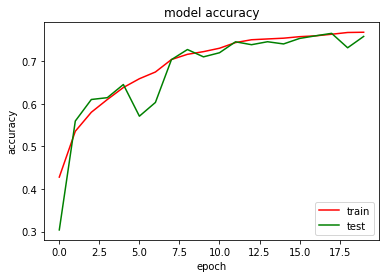

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history3.history['accuracy'], color='red')
ax.plot(history3.history['val_accuracy'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()